In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

In [6]:
train = pd.read_csv("../data/playground-series-s5e3/train.csv")
test = pd.read_csv("../data/playground-series-s5e3/test.csv")

print(f"Train set: {train.shape}")
print(f"Test set: {test.shape}")

features = ["day", "pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "winddirection", "windspeed"]

Train set: (2190, 13)
Test set: (730, 12)


In [8]:
id_sorted = train['id'].is_monotonic_increasing
days_sorted_per_id = train.groupby('id')['day'].apply(lambda x: x.is_monotonic_increasing).all()
is_ordered = id_sorted and days_sorted_per_id

print(f"The dataset is ordered by 'id' and 'day': {is_ordered}")

The dataset is ordered by 'id' and 'day': True


### Train dataset

In [9]:
print(train.dtypes)

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object


In [10]:
print(train.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [11]:
train["winddirection"].unique()

array([ 60. ,  50. ,  70. ,  40. ,  20. ,  30. ,  80. ,  90. , 220. ,
       100. , 290. , 170. , 200. , 230. , 240. , 130. , 270. , 120. ,
       190. , 210. , 110. , 160. ,  10. , 180. , 280. , 250. , 300. ,
       260. ,  25. ,  75. , 150. , 140. ,  15. , 250.3,  65. ])

In [12]:
train["day"].describe()

count    2190.000000
mean      179.948402
std       105.203592
min         1.000000
25%        89.000000
50%       178.500000
75%       270.000000
max       365.000000
Name: day, dtype: float64

In [13]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [14]:
print(train.describe())

                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39

rainfall
1    1650
0     540
Name: count, dtype: int64
Rainfall percentage: 75.34%


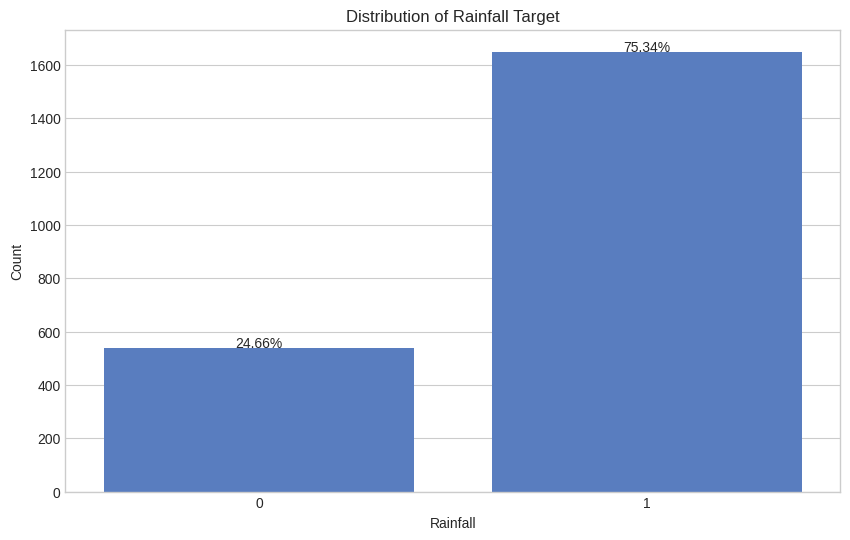

In [17]:
target_counts = train['rainfall'].value_counts()
print(target_counts)
print(f"Rainfall percentage: {target_counts[1] / len(train) * 100:.2f}%")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rainfall', data=train)
plt.title('Distribution of Rainfall Target')
plt.xlabel('Rainfall')
plt.ylabel('Count')

total = len(train['rainfall'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.savefig("eda/rainfall_train_distribution.png")
plt.show()
plt.close()

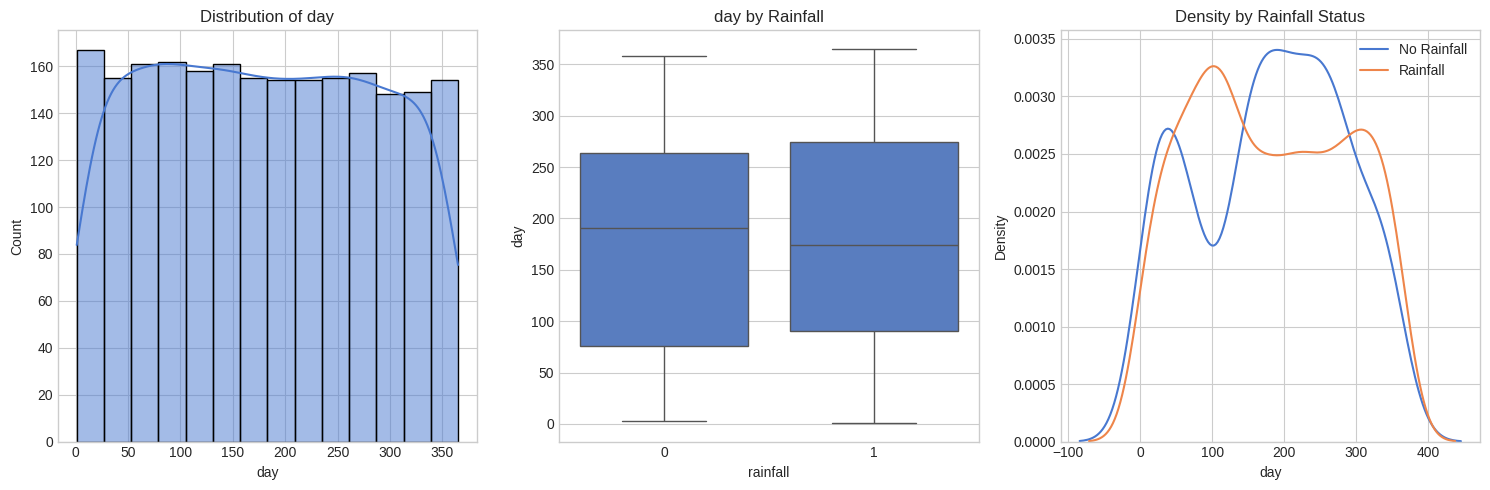

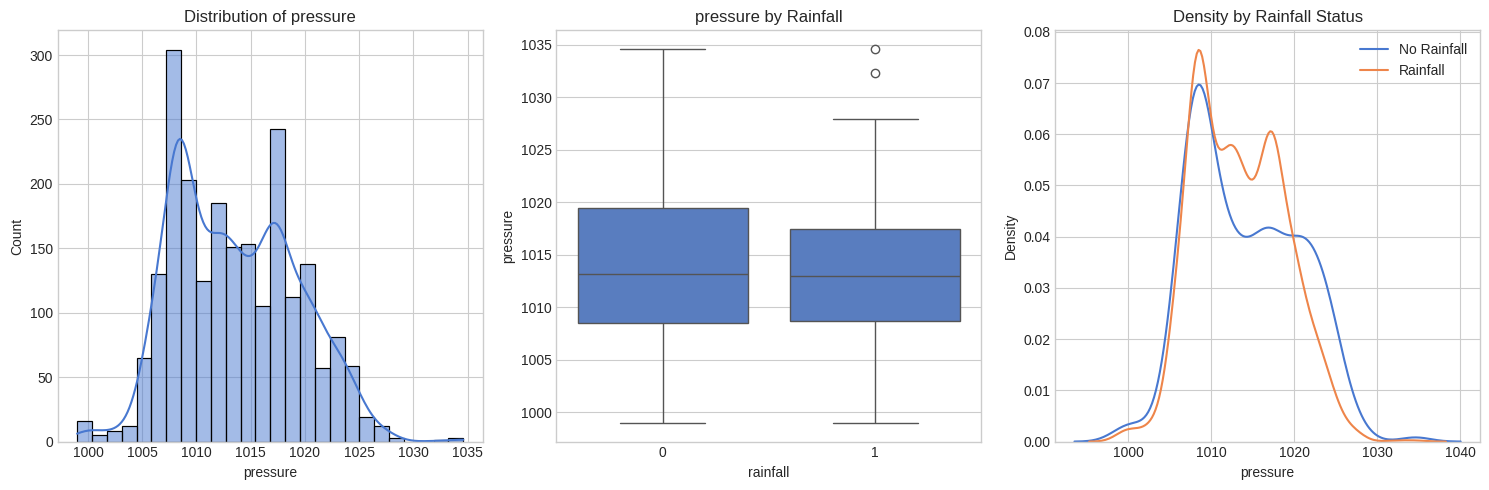

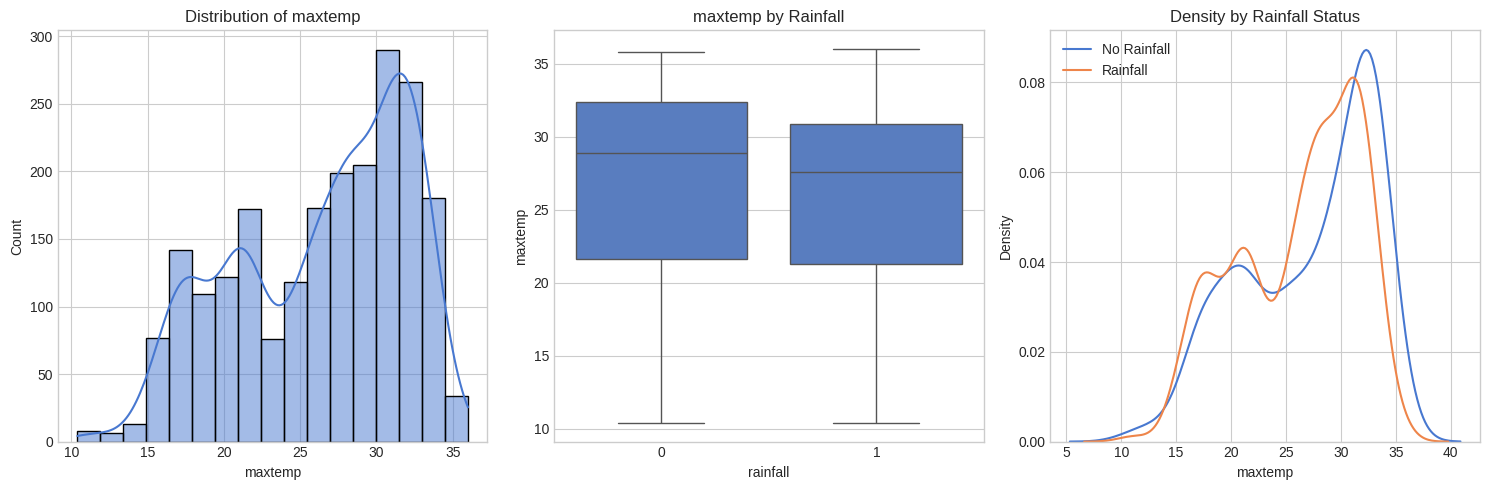

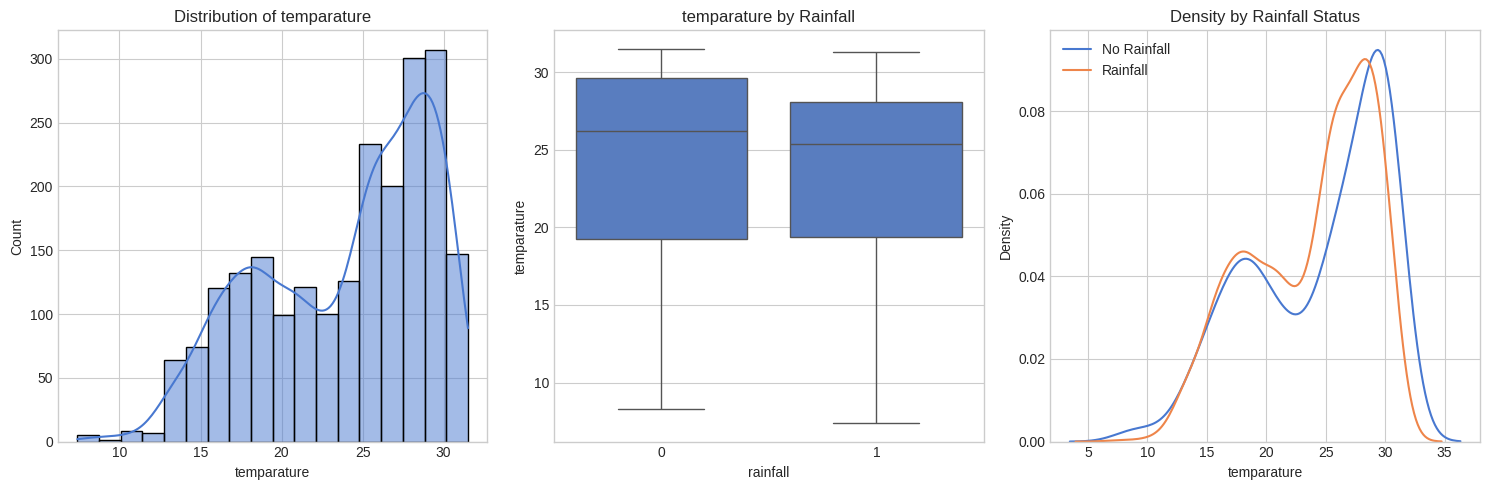

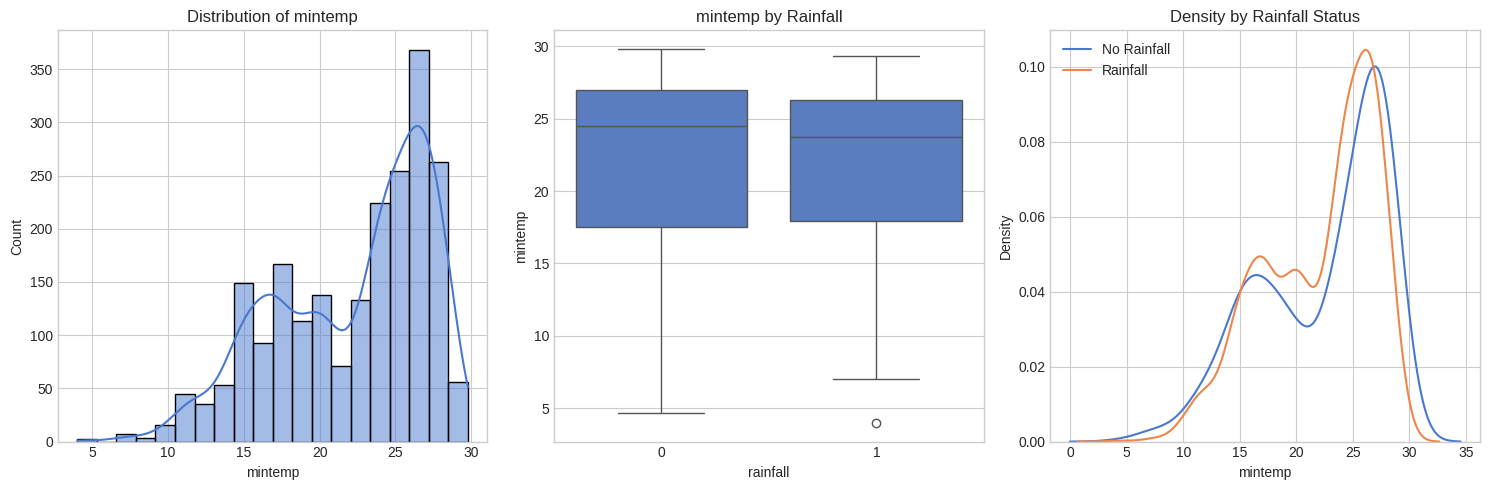

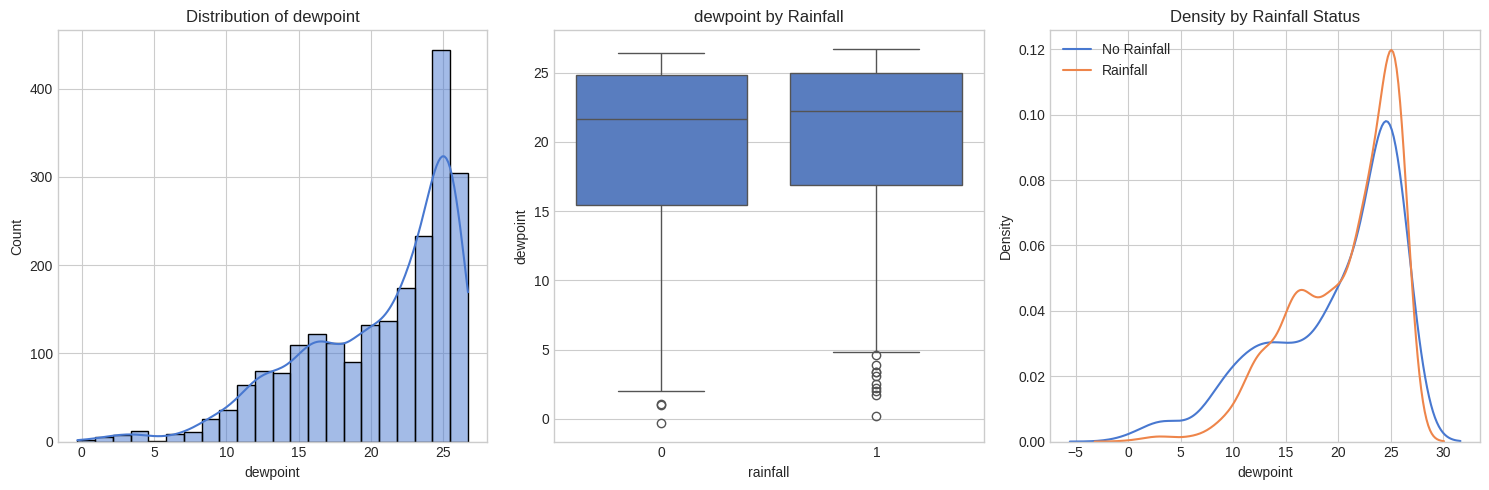

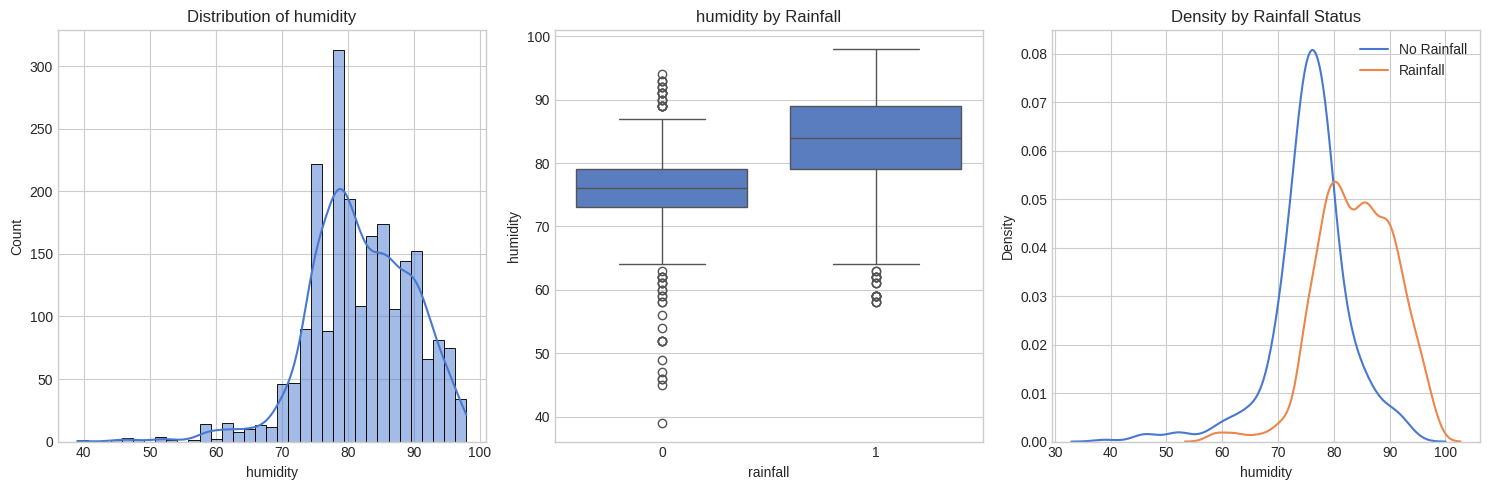

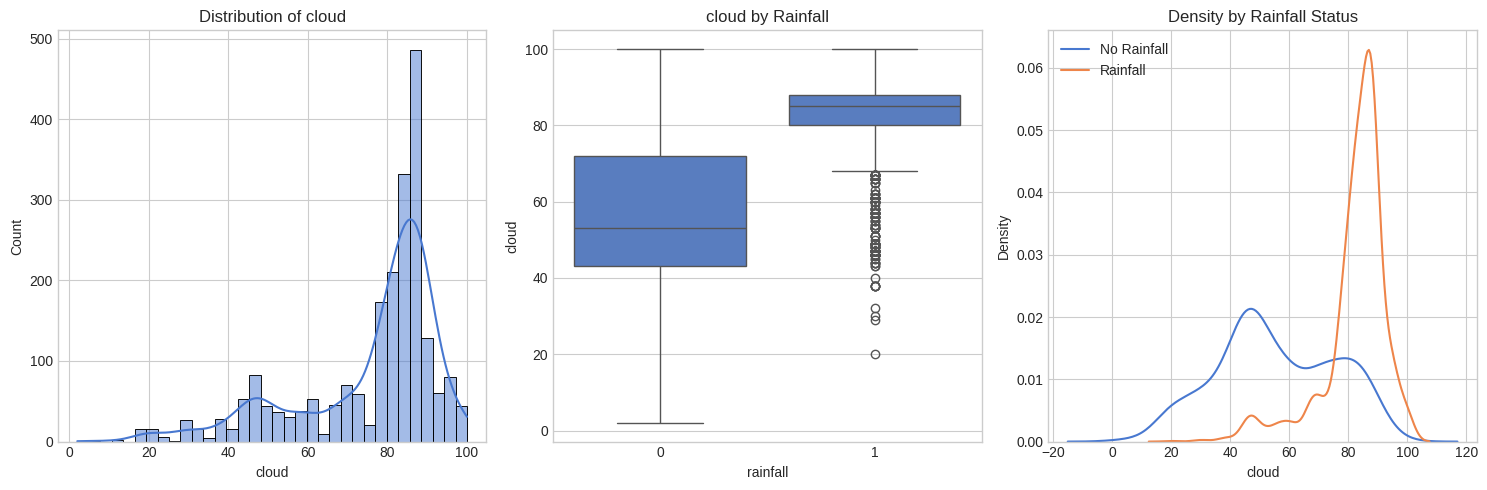

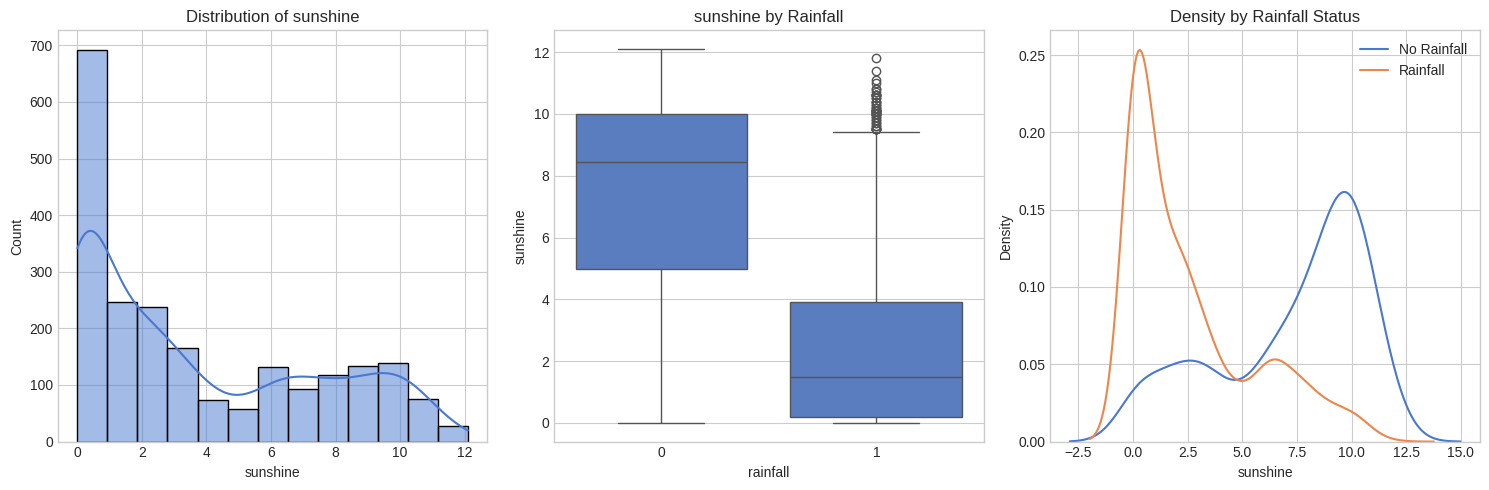

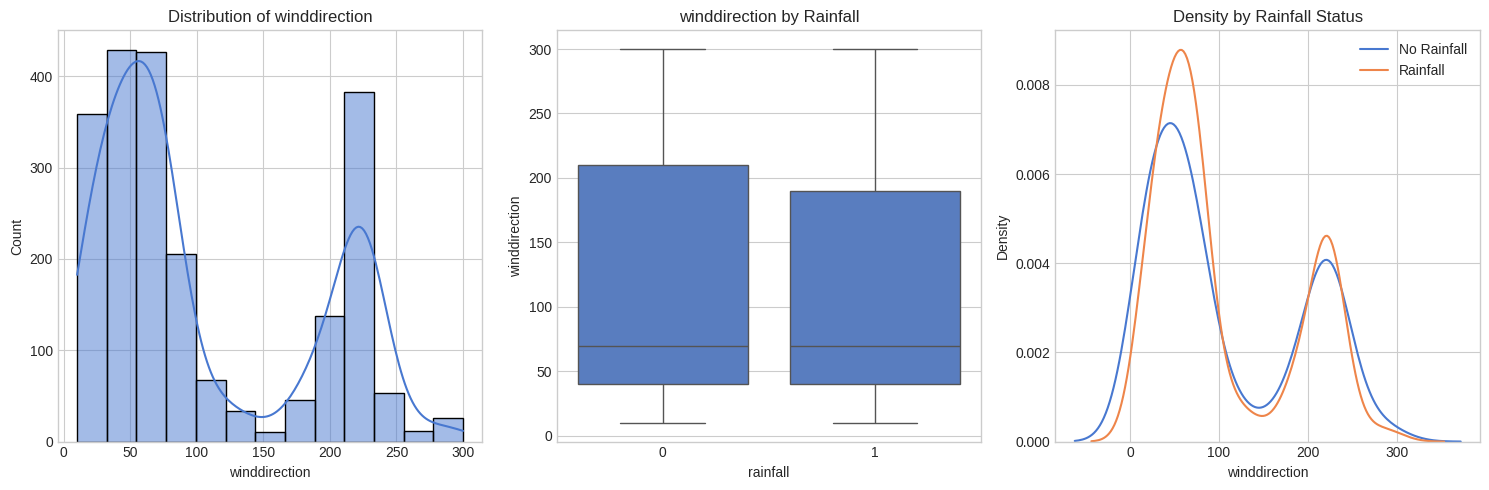

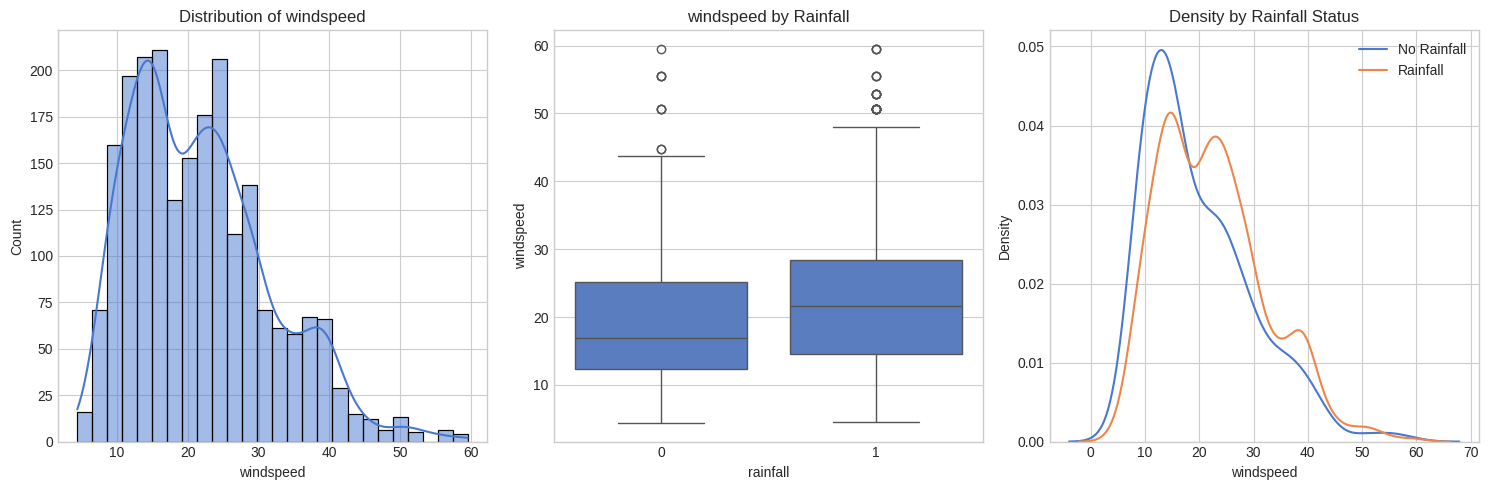

In [22]:
import eda
from eda import *
import importlib
importlib.reload(eda)

for feature in features:
    analyze_numerical_feature(feature, train, "train")

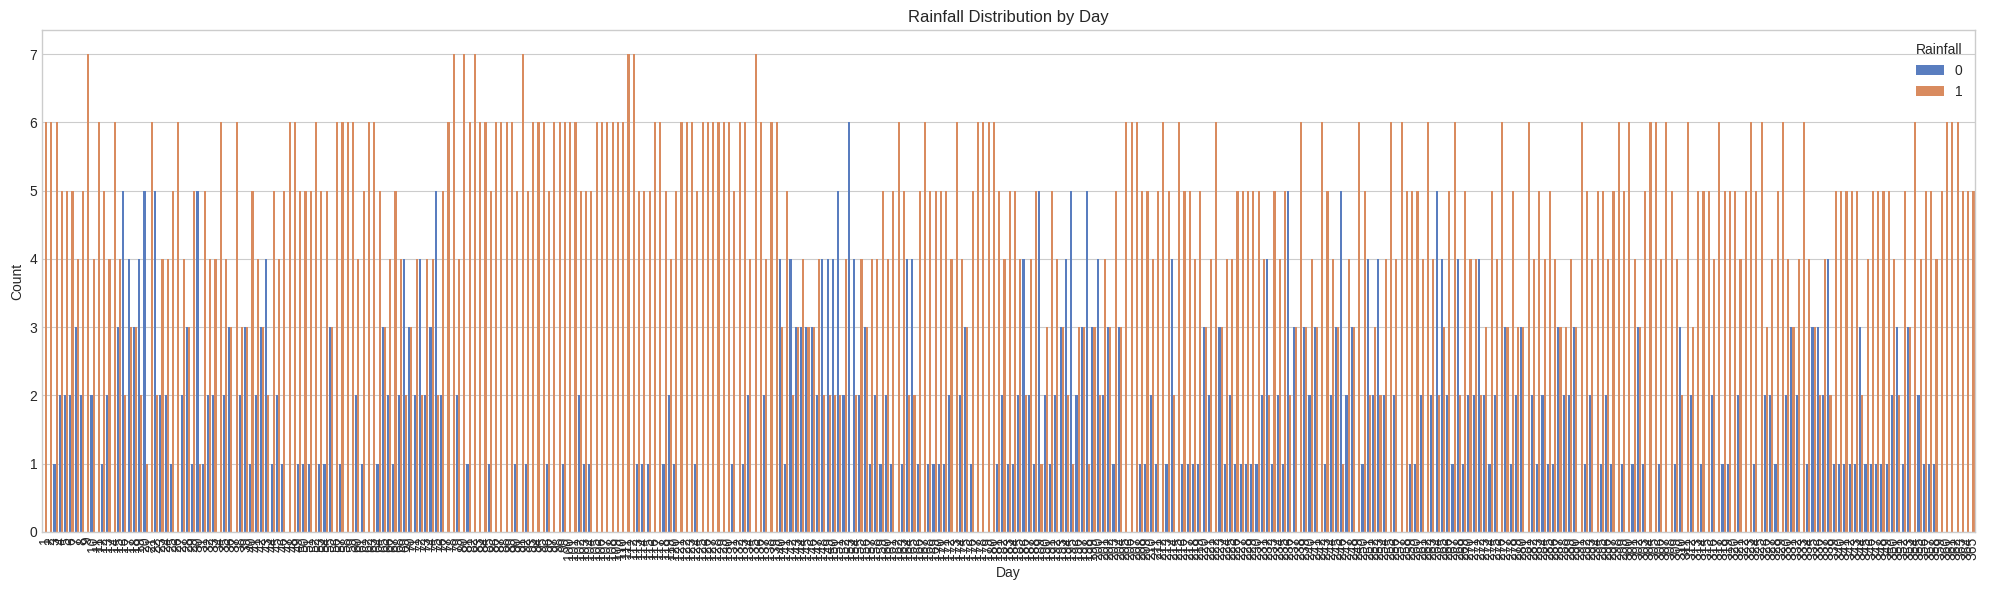

In [23]:
plt.figure(figsize=(20, 6))
sns.countplot(x='day', hue='rainfall', data=train)
plt.title('Rainfall Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Rainfall')
plt.xticks(rotation=90)
plt.tight_layout()

<Figure size 1000x1000 with 0 Axes>

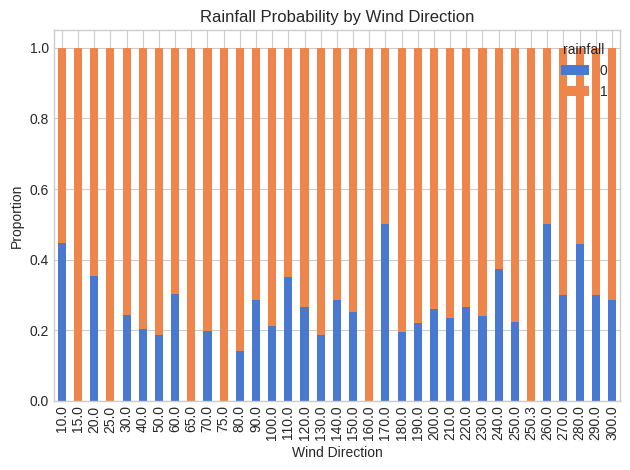

In [24]:
plt.figure(figsize=(10, 10))
wind_rainfall = pd.crosstab(train['winddirection'], train['rainfall'])
wind_rainfall_pct = wind_rainfall.div(wind_rainfall.sum(axis=1), axis=0)
wind_rainfall_pct.plot(kind='bar', stacked=True)
plt.title('Rainfall Probability by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

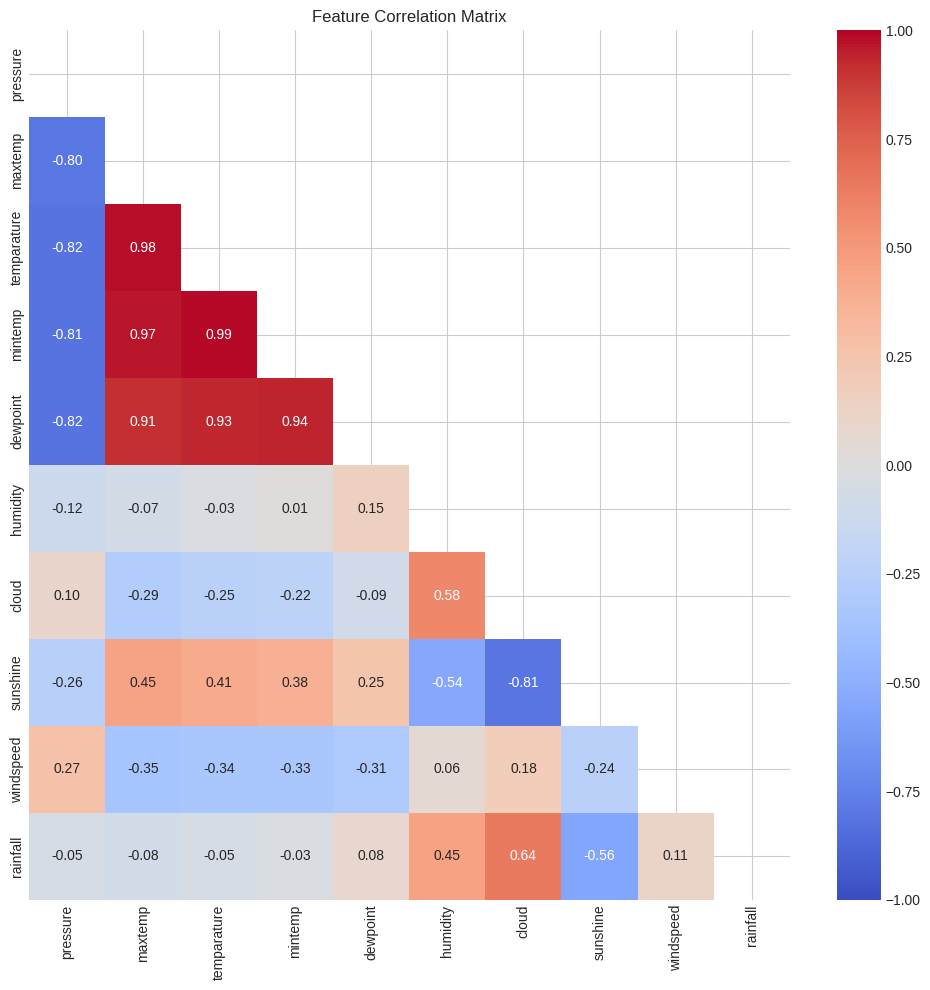

In [25]:
correlation_matrix = train.drop(['id', 'day', 'winddirection'], axis=1).corr()
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('eda/correlation_matrix_train.png')
plt.show()
plt.close()